In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [4]:
def carregar_dados(caminho_arquivo):
    try:
        dados = pd.read_csv(caminho_arquivo)
        print(f"Arquivo '{caminho_arquivo}' carregado com sucesso.")
        return dados
    except FileNotFoundError:
        print(f"Erro: Arquivo '{caminho_arquivo}' não encontrado.")
        exit()

In [5]:
def preprocessar_dados(df):
    dados_numericos = df.select_dtypes(include=['int64', 'float64']).copy()
    if 'target' in dados_numericos.columns:
        dados_numericos.drop(columns='target', inplace=True)
    imputador = SimpleImputer(strategy='mean')
    dados_imputados = imputador.fit_transform(dados_numericos)
    escalador = StandardScaler()
    dados_normalizados = escalador.fit_transform(dados_imputados)
    return dados_normalizados

In [6]:
def avaliar_clusters(X, k_range):
    resultados = {
        'k': [],
        'inercia': [],
        'silhueta': [],
        'davies_bouldin': []
    }
    for k in k_range:
        modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
        rotulos = modelo.fit_predict(X)

        resultados['k'].append(k)
        resultados['inercia'].append(modelo.inertia_)
        resultados['silhueta'].append(silhouette_score(X, rotulos))
        resultados['davies_bouldin'].append(davies_bouldin_score(X, rotulos))
    
    return resultados

In [7]:
def plotar_metricas(resultados):
    k_vals = resultados['k']
    
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_vals, resultados['inercia'], 'o-', label='Inércia')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inércia')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(k_vals, resultados['silhueta'], 's--', color='green', label='Silhueta')
    plt.title('Coeficiente de Silhueta')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Pontuação')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(k_vals, resultados['davies_bouldin'], 'd-.', color='red', label='DB Index')
    plt.title('Índice Davies-Bouldin')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Índice')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [8]:
def imprimir_k_ideais(resultados):
    k_silhueta = resultados['k'][np.argmax(resultados['silhueta'])]
    k_db = resultados['k'][np.argmin(resultados['davies_bouldin'])]
    print(f"\nMelhor valor de k pelo Silhouette Score: {k_silhueta}")
    print(f"Melhor valor de k pelo Davies-Bouldin Index: {k_db}")

Arquivo 'wine.csv' carregado com sucesso.


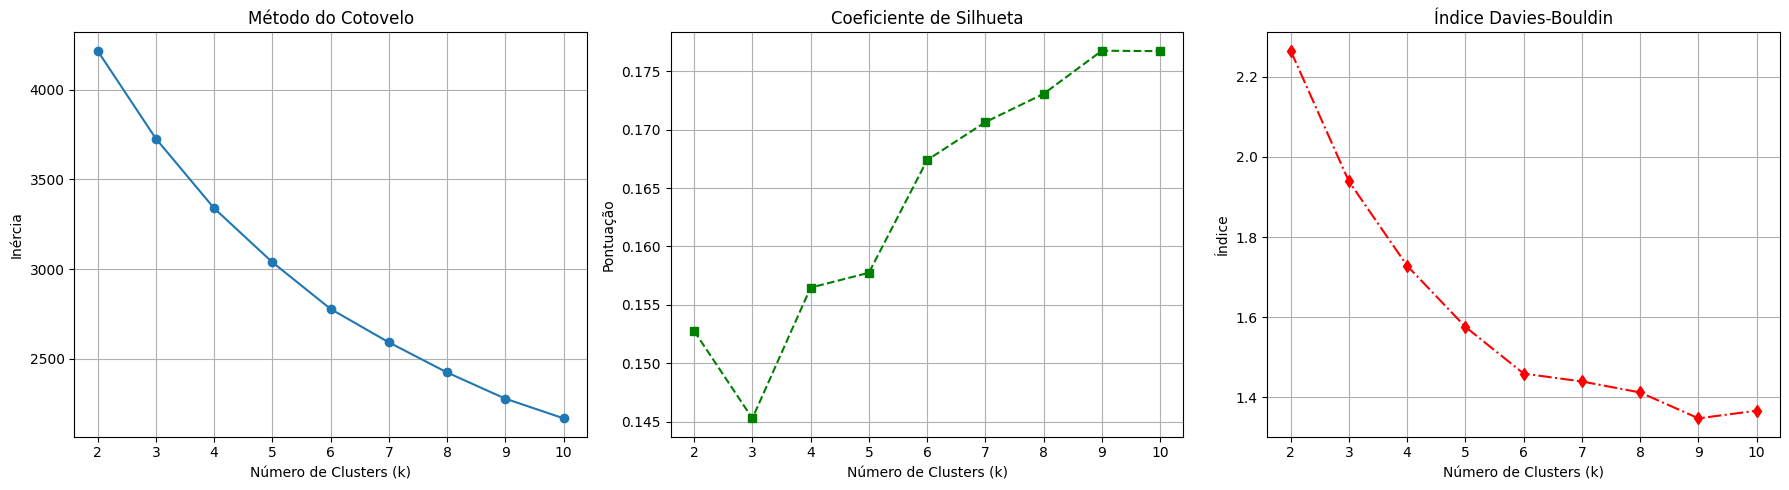


Melhor valor de k pelo Silhouette Score: 9
Melhor valor de k pelo Davies-Bouldin Index: 9


In [10]:
# Etapa 1: Carregar e preparar os dados
df = carregar_dados('wine.csv')
X_processado = preprocessar_dados(df)

# Etapa 2: Avaliar diferentes valores de k
valores_k = range(2, 11)
avaliacoes = avaliar_clusters(X_processado, valores_k)

# Etapa 3: Plotar métricas
plotar_metricas(avaliacoes)

# Etapa 4: Mostrar recomendações de kpip install pandas numpy scikit-learn

imprimir_k_ideais(avaliacoes)